In [2]:
#Electronic Online Store Tech_novan Dataset
#This dataset contains product reviews and metadata from Tech_novan, 
#including 7.8 million reviews spanning May 1996 - July 2014.

In [3]:
import numpy as np
import pandas as pd

In [4]:
electronics_data=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','Rating','timestamp'])

In [5]:
electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
electronics_data.shape

(7824482, 4)

In [7]:
#Taking subset of the dataset
electronics_data=electronics_data.iloc[:1048576,0:]

In [8]:
#Check the datatypes
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [9]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048576 non-null  object 
 1   productId  1048576 non-null  object 
 2   Rating     1048576 non-null  float64
 3   timestamp  1048576 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [10]:
#Five point summary,With the help of Numpy ndarray.T object, 
#we can make a Transpose of an array having dimension greater than or equal to 2. 
electronics_data.describe()['Rating'].T

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [11]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [12]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/home/nishant/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


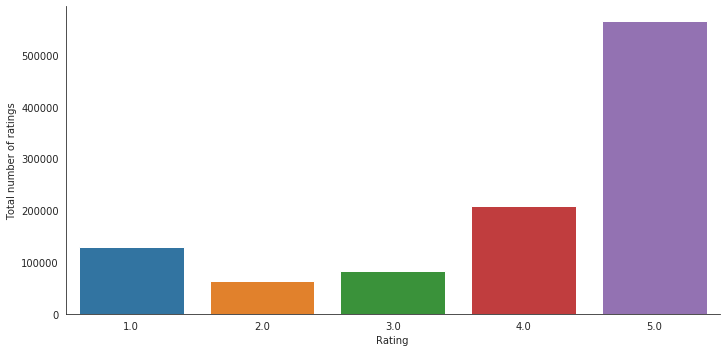

In [14]:
g = sns.factorplot("Rating", data=electronics_data, aspect=2.0,kind='count')
g.set_ylabels("Total number of ratings")

In [15]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of products  :", len(np.unique(electronics_data.productId)))


Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


In [16]:
#Dropping the Timestamp column
electronics_data.drop(['timestamp'], axis=1,inplace=True)

In [17]:
#Analysis of rating given by the user 
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

In [18]:
no_of_rated_products_per_user.describe()

count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: Rating, dtype: float64

In [19]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

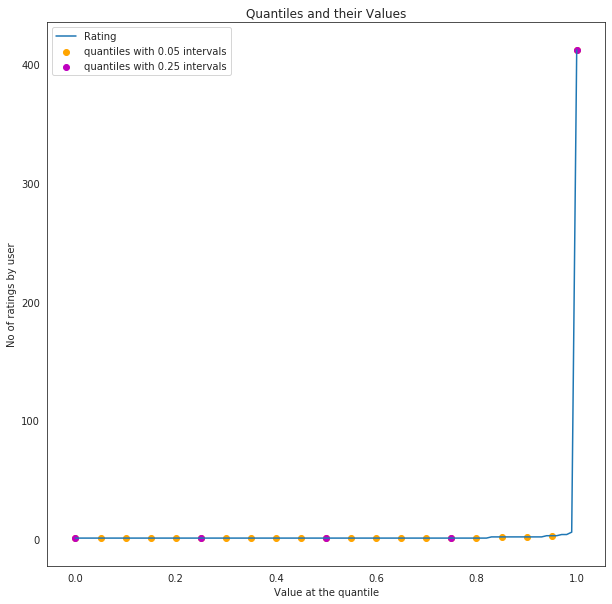

In [20]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [21]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 38



In [22]:
"""
Popularity Based Recommendation
Popularity based recommendation system works with the trend. It basically uses 
the items which are in trend right now. For example, if any product which is usually 
bought by every new user then there are chances that it may suggest 
that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization 
is not available with this method i.e. even though you know the behaviour of the user 
you cannot recommend items accordingly.
"""

'\nPopularity Based Recommendation\nPopularity based recommendation system works with the trend. It basically uses \nthe items which are in trend right now. For example, if any product which is usually \nbought by every new user then there are chances that it may suggest \nthat item to the user who just signed up.\n\nThe problems with popularity based recommendation system is that the personalization \nis not available with this method i.e. even though you know the behaviour of the user \nyou cannot recommend items accordingly.\n'

In [23]:
#Getting the new dataframe which contains users who has given 50 or more ratings
new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

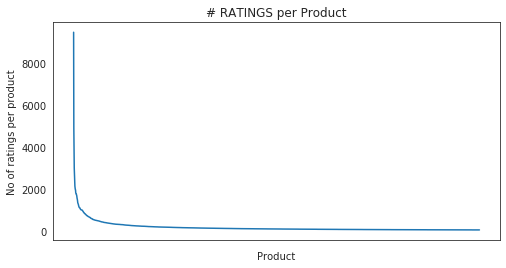

In [24]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [25]:
#Average rating of the product 
new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [26]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B000I1X3W8    4.869565
Name: Rating, dtype: float64

In [27]:
#Total no of rating for product

new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: Rating, dtype: int64

In [28]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())

In [29]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

In [30]:
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [31]:
ratings_mean_count['rating_counts'].max()

9487

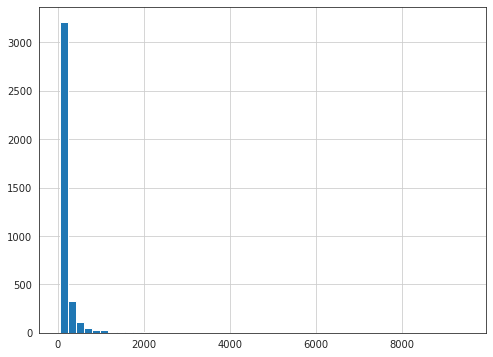

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

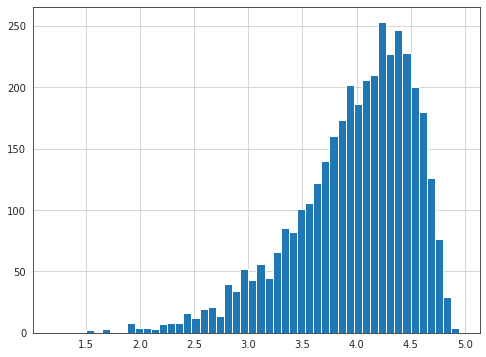

In [33]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

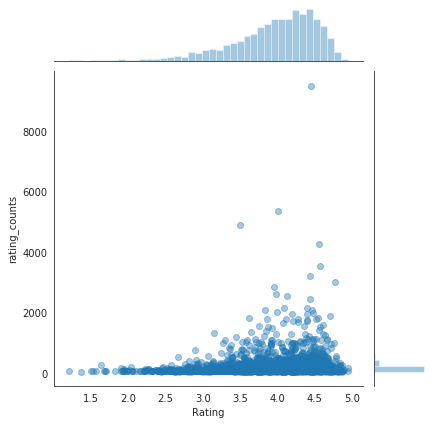

In [34]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

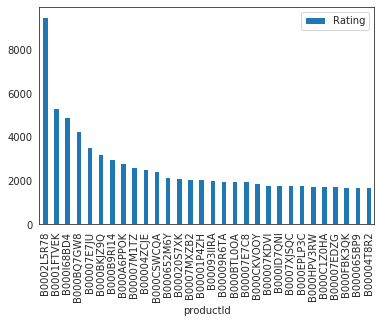

In [35]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [36]:
"""
Collaberative filtering (Item-Item recommedation)¶
Collaborative filtering is commonly used for recommender systems. 
These techniques aim to fill in the missing entries of a user-item association matrix. 
We are going to use collaborative filtering (CF) approach. 
CF is based on the idea that the best recommendations come from people who have similar tastes. 
In other words, it uses historical item ratings of like-minded people to predict 
how someone would rate an item.Collaborative filtering has two sub-categories 
that are generally called memory based and model-based approaches.
"""

'\nCollaberative filtering (Item-Item recommedation)¶\nCollaborative filtering is commonly used for recommender systems. \nThese techniques aim to fill in the missing entries of a user-item association matrix. \nWe are going to use collaborative filtering (CF) approach. \nCF is based on the idea that the best recommendations come from people who have similar tastes. \nIn other words, it uses historical item ratings of like-minded people to predict \nhow someone would rate an item.Collaborative filtering has two sub-categories \nthat are generally called memory based and model-based approaches.\n'

In [37]:
"""
Memory-based models calculate the similarities between users / items based on user-item rating pairs.
"""

'\nMemory-based models calculate the similarities between users / items based on user-item rating pairs.\n'

In [38]:
"""
 For an item I, with a set of similar items determined based on rating vectors consisting 
 of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items 
 from the similarity list that have been rated by U and calculating the rating based on these N ratings.
 Item-based collaborative filtering was developed by Amazon. In a system where there are more 
 users than items, item-based filtering is faster and more stable than user-based. 
 It is effective because usually, the average rating received by an item doesn’t change as 
 quickly as the average rating given by a user to different items. It’s also known to 
 perform better than the user-based approach when the ratings matrix is sparse.
"""

'\n For an item I, with a set of similar items determined based on rating vectors consisting \n of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items \n from the similarity list that have been rated by U and calculating the rating based on these N ratings.\n Item-based collaborative filtering was developed by Amazon. In a system where there are more \n users than items, item-based filtering is faster and more stable than user-based. \n It is effective because usually, the average rating received by an item doesn’t change as \n quickly as the average rating given by a user to different items. It’s also known to \n perform better than the user-based approach when the ratings matrix is sparse.\n'

In [39]:
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [40]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [41]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)


In [42]:
data

In [43]:
new_df

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5.0
1048572,A1C2OANTC49AQI,B000IF51UQ,5.0
1048573,A2JL0387FDDFS,B000IF51UQ,5.0
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4.0


In [44]:
reader

In [45]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo1 = KNNWithMeans(k=40, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo1.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [47]:
# run the trained model against the testset
test_pred1 = algo1.test(testset)

In [48]:
#KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.
"""
Here the function will display the 50 closest neighbours to a user which have rated the
products in a very similar way as the user being considered. 
The algorithm identifies these neighbours using ‘pearson_baseline’. 
This step accomplishes the training of the model. 
Moreover, this model can also predict a rating that 
a user might give to a product that he or she has not watched yet. 
"""

'\nHere the function will display the 50 closest neighbours to a user which have rated the\nproducts in a very similar way as the user being considered. \nThe algorithm identifies these neighbours using ‘pearson_baseline’. \nThis step accomplishes the training of the model. \nMoreover, this model can also predict a rating that \na user might give to a product that he or she has not watched yet. \n'

In [49]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred1, verbose=True)

Item-based Model : Test Set
RMSE: 1.3436


1.3436404212716

In [ ]:
#A basic collaborative filtering algorithm.

In [50]:
algo2 = KNNBasic(k=40, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo2.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [51]:
# run the trained model against the testset
test_pred2 = algo2.test(testset)

In [52]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred2, verbose=True)

Item-based Model : Test Set
RMSE: 1.3588


1.3587859362325683

In [53]:
#KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.
algo3 = KNNBaseline(k=40, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo3.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [54]:
# run the trained model against the testset
test_pred3 = algo3.test(testset)
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred3, verbose=True)

Item-based Model : Test Set
RMSE: 1.2713


1.271334990436156

In [59]:
"""
the estimated ratings on average are about 1.271 higher or lower than the actual ratings, on a 1 to 10 scale
"""

'\nthe estimated ratings on average are about 1.271 higher or lower than the actual ratings, on a 1 to 10 scale\n'

In [55]:
#KNNBaseline algorithm gave us the best rmse, therefore, we will train and predict with KNNBaseline

In [56]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(test_pred3, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [57]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
187426,A1STLI9K7PD3HI,B00006BBAB,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",2,158,0.0
63442,A89Z6QDQND21B,B000HPV3RW,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",2,1234,0.0
63465,ALIJ4O5JX76A6,B00007EDZG,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,1212,0.0
188904,A3FKQQTSMHOCE0,B0002XQJFA,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",8,80,0.0
28486,ARBKYIVNYWK3C,B0006I1TRY,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",21,314,0.0
28477,A2ZZAM4LFM4IE1,B00011KM38,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",2,410,0.0
122555,AM9QCPHWDPLFF,B0000VYJRY,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",2,327,0.0
152003,A206E6WQ6O1L5G,B000GAS3A8,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,75,0.0
5384,AZ2PEMPT3U5GR,B0002BEQN4,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,183,0.0
152001,AH2NG0HB9DX6S,B00007E7JU,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,2446,0.0


In [61]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
96786,A2QQ0UP16AWCRH,B0009STJIW,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,147,4.0
3337,A3AFIF3XDFKEJ9,B00081A2KY,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,685,4.0
45457,A1GUJ2DDBVMYDA,B00009XVCZ,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",4,789,4.0
110791,A3EF5CHV31FEOJ,B000BP8AY2,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,463,4.0
2028,A2O7P0578BBFBB,B000ANOY7M,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,439,4.0
91999,AAZPUZHMOA6UP,B0000A0AJH,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,294,4.0
108384,ADIZV8SVZ2XZI,B000I68BD4,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,3475,4.0
183618,A2GY599KHBVD6L,B00001P4XA,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,391,4.0
8162,A84T8Q141GE57,B0002BEQN4,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",2,183,4.0
23450,A220WCFHHMV2X4,B00001ZWXA,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",2,227,4.0


In [62]:
algo3.predict(uid = 'ARBKYIVNYWK3C	', iid = 'B000I68BD4')

Prediction(uid='ARBKYIVNYWK3C\t', iid='B000I68BD4', r_ui=None, est=3.4993793603732377, details={'was_impossible': False})

In [63]:
"""
r_ui is None, because the user does not have an actual rating for that item. 
It is the est item that we are ultimately interested in, that is the estimated rating, in our case
"""

'\nr_ui is None, because the user does not have an actual rating for that item. \nIt is the est item that we are ultimately interested in, that is the estimated rating, in our case\n'

In [64]:
"""
Model-based collaborative filtering system
These methods are based on machine learning and data mining techniques. 
The goal is to train models to be able to make predictions. 
For example, we could use existing user-item interactions to train a model to predict the 
top-5 items that a user might like the most. 
One advantage of these methods is that they are able to recommend a larger number of items to a 
larger number of users, compared to other methods like memory based approach. 
They have large coverage, even when working with large sparse matrices.
"""

'\nModel-based collaborative filtering system\nThese methods are based on machine learning and data mining techniques. \nThe goal is to train models to be able to make predictions. \nFor example, we could use existing user-item interactions to train a model to predict the \ntop-5 items that a user might like the most. \nOne advantage of these methods is that they are able to recommend a larger number of items to a \nlarger number of users, compared to other methods like memory based approach. \nThey have large coverage, even when working with large sparse matrices.\n'

In [65]:
#As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
ratings_matrix.shape

(9832, 76)

In [67]:
#Transposing the matrix
X = ratings_matrix.T
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#Unique products in subset of data
X1 = X

In [69]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [70]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [71]:
X.index[75]

'B00000K135'

In [72]:
#Index # of product ID purchased by customer

i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [73]:
#Correlation for all items with the item purchased by this customer based on items 
#rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

In [74]:
#Recommending top 25 highly correlated products in sequence

Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['B00000J4EY']

In [75]:
#Here are the top 10 products to be displayed by the recommendation system to the above customer 
#based on the purchase history of other customers in the website.